In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import util
import collections
%matplotlib inline

In [3]:
folder_path = "../data/MonthwiseData/"
weeks = {}
for i in range(2008, 2019):
    vals = util.read_2D_values(folder_path + str(i) + ".csv")
    vals = vals[1:]
#     print(vals)
    for j in range(0, len(vals)):
        if i not in  weeks.keys():
            weeks[i] = {}
        weeks[i][vals[j][0]] = vals[j][1]

# print( weeks )

for year in weeks:
#     print(year)
    temp = []
    for i in range(1, 54):
#         print(weeks[year].keys())
#         print(weeks[year][str(i)])
        if str(i) in weeks[year].keys():
            temp.append( weeks[year][str(i)] )
        else:
            temp.append( 0 )
    weeks[year] = temp

print( len(weeks[2008]) )

53


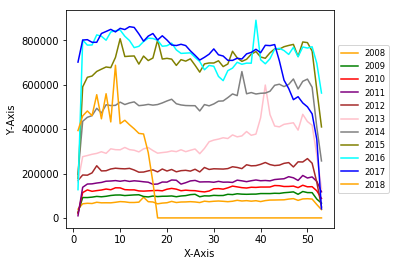

In [4]:
X_range = np.array( range(1, 54) )
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
counter = 1
for year in weeks:
    weeks[year] = np.array( weeks[year] ).astype(np.float)
    plots.append( util.getYPlotObj(weeks[year], "line", label=year, color=colors[counter%len(colors)]) )
    counter += 1
    
#         plots.append( util.getYPlotObj(langs[lang], "line", color=colors[counter%len(colors)]) )
util.plot_graph(X_range, plots, showLegend=True)

In [14]:
sumWeeks = collections.OrderedDict()
week = [i for i in range(0,53)]
sumCommit = [0 for i in range(0,53)]

for i in range(0,53):
    for year in weeks:
        sumCommit[i]+=sumCommit[i]+weeks[year][i]

OrderedDict()


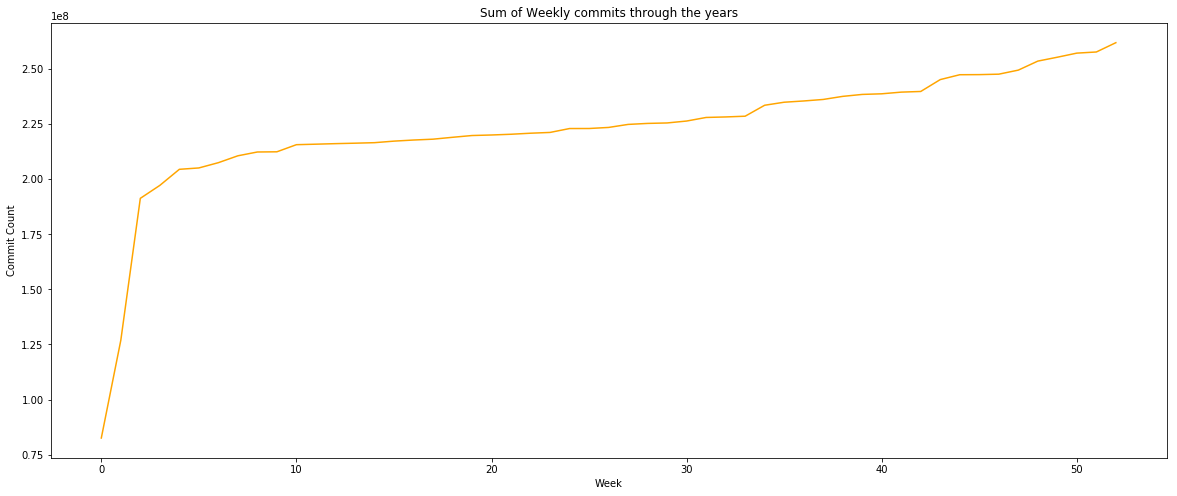

In [16]:

x_vals = np.array(week).astype(np.int)
y_vals = np.array(sumCommit).astype(np.int)
x_vals.sort()
y_vals.sort()

plt.figure(figsize=(20,8))
plt.plot(x_vals, y_vals, color='orange')
plt.xlabel('Week')
plt.ylabel('Commit Count')
plt.title('Sum of Weekly commits through the years')
plt.show()